# Sentiment Classifier

### Step 1: Load and Explore the Dataset

We’ll use the IMDB movie reviews dataset for binary sentiment classification (positive / negative).

Dataset link: [IMDB Dataset of 50K Movie Reviews (Kaggle)](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set visualization style
sns.set_theme(style="whitegrid")

#### 1. Load the dataset

In [4]:
data_path = "IMDB Dataset.csv"
df = pd.read_csv(data_path)

# Display basic information
print("✅ Dataset loaded successfully!")
print("Number of samples:", len(df))
print("\nData preview:")
display(df.head(10))

✅ Dataset loaded successfully!
Number of samples: 50000

Data preview:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


#### 2. Basic info and class balance

In [5]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [6]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
review       0
sentiment    0
dtype: int64


In [7]:
# Check class distribution
print("\nClass distribution:")
print(df["sentiment"].value_counts())


Class distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


### Step 2 — Text Preprocessing & TF-IDF Features

We’ll prepare our text data step by step:
1. Clean text — remove punctuation, HTML tags, lowercase, etc.
2. Tokenize — split text into words.
3. Remove stopwords — common words like the, is, and that don’t add much meaning.
4. Convert text to numeric features using TF-IDF (Term Frequency–Inverse Document Frequency).
5. Split data into train/test sets.

In [8]:
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.data.path.append(r"C:\Users\Avirup\AppData\Roaming\nltk_data")

#### 1. Download NLTK resources (needed only once)

In [9]:
nltk.download("stopwords")
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avirup\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Avirup\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#### 2. Clean and preprocess the text

In [10]:
def clean_text(text):
    """
    Cleans the input text by:
    1. Removing HTML tags
    2. Removing punctuation and numbers
    3. Lowercasing all words
    4. Removing extra whitespaces
    """
    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)
    # Remove punctuation and numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text


df["clean_review"] = df["review"].apply(clean_text)

# Quick preview of cleaned text
print("Original review:")
print(df["review"][0][:500])
print("\nCleaned review:")
print(df["clean_review"][0][:500])

Original review:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ

Cleaned review:
one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz

In [11]:
# Tokenization and stopword removal

stop_words = set(stopwords.words("english"))


def preprocess_text(text):
    """
    Tokenizes text and removes stopwords.
    Returns a list of meaningful tokens.
    """
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


print(f'Before this step, a clean review looked like:\n{df["clean_review"][0]}\n')

# Apply preprocessing
df["clean_review"] = df["clean_review"].apply(preprocess_text)

print(f'Now a clean review looks like:\n{df["clean_review"][0]}')

Before this step, a clean review looked like:
one of the other reviewers has mentioned that after watching just oz episode you ll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes wh

In [12]:
# Encode sentiment labels
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})

In [13]:
# Split into train/test sets

X_train, X_test, y_train, y_test = train_test_split(
    df["clean_review"],
    df["label"],
    test_size=0.2,
    random_state=42,
    stratify=df["label"],
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 40000, Testing samples: 10000


Here, let's stop for a moment and understand what **TF-IDF vectorization** does.

### 🧾 **Understanding TF-IDF Vectorization**

In NLP, machine learning models can’t work directly with raw text — they need **numerical features**.
One of the most common ways to convert text into numbers is **TF-IDF**, which stands for: **Term Frequency – Inverse Document Frequency**

It measures **how important a word (or phrase)** is to a document in a collection of documents.

Here’s how it works conceptually:

* **Term Frequency (TF):**
  How often a word appears in a given document.
  For example, if “movie” appears 3 times in a 100-word review, its TF = 3/100 = 0.03.

* **Inverse Document Frequency (IDF):**
  How *unique* that word is across all documents.
  Common words like “the” or “is” appear in almost every review, so their IDF is low.
  Rare, meaningful words like “masterpiece” or “boring” appear in fewer reviews, so their IDF is high.

The **TF-IDF score** for each word = TF × IDF.
This way, we get higher scores for words that are *frequent in a specific review* but *rare across the entire dataset* — great for detecting sentiment-bearing words.

---

### ⚙️ **Code Explanation**

We now use `TfidfVectorizer` from scikit-learn to automatically:

1. Tokenize the text (split into words) (Yeah, I know. We have already done this separately)
2. Remove common punctuation and lowercase all words (Also done)
3. Compute TF-IDF scores for each word (and phrase)
4. Produce a **sparse matrix** where:

   * Each row represents a review
   * Each column represents a word or phrase
   * Each cell contains the TF-IDF score for that word in that review

**Parameters explained:**

| Argument             | Meaning                                                                                                                                   |
| -------------------- |----------------------------------------------------------------------------------------------------------------------------------------- |
| `max_features=10000` | Keeps only the 10,000 most frequent terms in the vocabulary (helps reduce dimensionality and computation time).                       |
| `ngram_range=(1, 2)` | Includes both unigrams (single words) and bigrams (two-word phrases). For example, “not good” becomes a distinct feature.         |
| `sublinear_tf=True`  | Applies **sublinear scaling** (uses `1 + log(tf)` instead of raw term frequency). This helps prevent very frequent words from dominating. |

For more details on `TfidfVectorizer`, you can visit [scikit-learn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

After defining the vectorizer, we:

* **Fit and transform** the training data → `tfidf.fit_transform(X_train)`
  (This learns the vocabulary + computes TF-IDF values.)
* **Transform** the test data → `tfidf.transform(X_test)`
  (Uses the same learned vocabulary to ensure consistency.)

The resulting matrices `X_train_tfidf` and `X_test_tfidf` contain all the numerical features we’ll feed into machine-learning models.



In [14]:
# TF-IDF Vectorization

tfidf = TfidfVectorizer(
    max_features=10000,  # limit vocabulary to 10k most frequent words
    ngram_range=(1, 2),  # include unigrams and bigrams
    sublinear_tf=True,  # apply sublinear term frequency scaling
)

In [15]:
# Learn vocabulary and transform text
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("\n✅ TF-IDF feature extraction complete!")
print(f"TF-IDF matrix shape (train): {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape (test):  {X_test_tfidf.shape}")


✅ TF-IDF feature extraction complete!
TF-IDF matrix shape (train): (40000, 10000)
TF-IDF matrix shape (test):  (10000, 10000)


### Step 3: Train and Evaluate Classic ML Models

We’ll use two widely used baseline algorithms:

1. **Logistic Regression** (simple, strong baseline for text classification)
2. **Support Vector Machine (SVM)** (often performs well on sparse TF-IDF features)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#### Logistic Regression

✅ Logistic Regression Results
Accuracy: 0.9013

Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      5000
    Positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



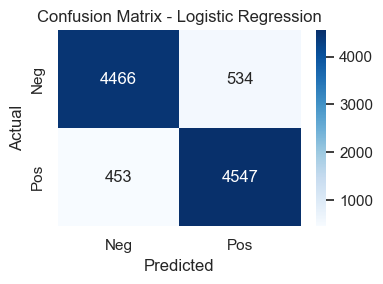

In [17]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

y_pred_lr = log_reg.predict(X_test_tfidf)

print("✅ Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=["Negative", "Positive"]))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(4, 3))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Neg", "Pos"],
    yticklabels=["Neg", "Pos"],
)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

#### Linear SVM


✅ Linear SVM Results
Accuracy: 0.8905

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89      5000
    Positive       0.89      0.89      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



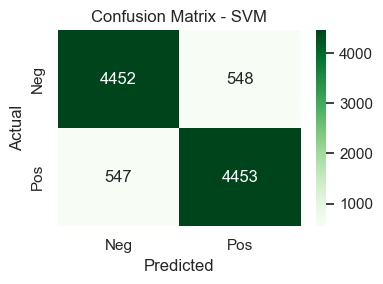

In [20]:
svm_clf = LinearSVC()
svm_clf.fit(X_train_tfidf, y_train)

y_pred_svm = svm_clf.predict(X_test_tfidf)

print("\n✅ Linear SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=["Negative", "Positive"]))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 3))
sns.heatmap(
    cm_svm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["Neg", "Pos"],
    yticklabels=["Neg", "Pos"],
)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### **Model Performance Summary**

Both Logistic Regression and Linear SVM achieved strong performance on the IMDB sentiment classification task using TF-IDF features.

* Logistic Regression slightly outperformed Linear SVM in both **accuracy** and **precision/recall**, misclassifying fewer reviews overall.
* Both models demonstrate **balanced performance** between positive and negative classes, indicating that the TF-IDF representation captures sentiment effectively.
* Given its slightly better scores and simpler training, **Logistic Regression** will be chosen as the baseline model for comparison in the next stage (Word2Vec embeddings).

### Step 4: Using Word2Vec Embeddings

We’ll do this in two parts:

1. Train our own Word2Vec model on the IMDB reviews.
2. Use pre-trained embeddings (Google’s Word2Vec or Gensim’s built-ins) for better generalization.

For both, we’ll compute a review embedding as the average of its word embeddings and train our classifiers again.

### PART 1 - Train our own model on the IMDB reviews
#### 1.1 Train a Word2Vec Model 

In [23]:
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

Let's pause again for a moment and understand what Word2Vec is:

### 🧾 **Word2Vec Embeddings**

So far, we used **TF-IDF**, which treats text as bags of words — it knows *which words occur* but not *what they mean* or *how they relate*.

To move toward **semantic understanding**, we use **Word2Vec**, a neural-network-based model that represents each word as a **dense numerical vector** in a high-dimensional space.
Words with **similar meanings** end up having **similar vectors** — e.g.,
`vector("good")` will be close to `vector("great")`, and `vector("awful")` will be far apart.

---

### 🧠 **How Word2Vec Works**

Word2Vec learns embeddings using one of two training strategies:

1. **CBOW (Continuous Bag of Words):**

   * Predicts a word based on its surrounding context words.
   * Example: given “*the movie was [*__*]*”, it predicts “great”.
   * Works well for large datasets and frequent words.

2. **Skip-Gram:**

   * Does the opposite — predicts *context words* given a *target word*.
   * Example: given the word “great”, it tries to predict nearby words like “movie”, “was”.
   * Performs better for smaller datasets and captures rare-word representations more effectively.

We’ll use **Skip-Gram** in our project (`sg=1`).

---

### ⚙️ **Key Parameters in `Word2Vec`**

| Parameter             | Description                                                                                                                                                                                                                                                         |
| --------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`sentences`**       | The list of tokenized reviews (each review is a list of words). This is the text corpus used for training the embeddings.                                                                                                                                           |
| **`vector_size=100`** | Dimensionality of the resulting word vectors. Each word will be represented by a 100-dimensional vector. Larger sizes can capture more nuances but require more data and computation.                                                                               |
| **`window=5`**        | The **context window size** — how many words to the left and right of a target word are considered “context.” For example, in the sentence *“The movie was absolutely fantastic”*, a window of 5 means each word will learn from up to 5 words before and after it. |
| **`min_count=3`**     | Ignores words that appear fewer than 3 times in the corpus. This helps remove noise and rare words that don’t contribute much to learning.                                                                                                                          |
| **`workers=4`**       | Number of CPU cores used for training (helps parallelize computations).                                                                                                                                                                                             |
| **`sg=1`**            | Specifies **Skip-Gram** training (set `sg=0` for CBOW). Skip-Gram is generally better for smaller datasets and capturing semantic relationships.                                                                                                                    |
| **`epochs=10`**       | Number of passes over the entire dataset during training. More epochs → better learning (to a point) but also longer training time.                                                                                                                                 |

---

### 📦 **What Happens Next**

* After training, each word in the vocabulary has a learned vector representation accessible via `w2v_model.wv['word']`.
* To represent a **whole review**, we’ll compute the **average of its word embeddings** — this creates a single fixed-length feature vector per review, suitable for machine learning models.



In [24]:
# Tokenize each cleaned review into a list of words
tokenized_reviews = [word_tokenize(review) for review in df["clean_review"]]

w2v_model = Word2Vec(
    sentences=tokenized_reviews,  # our tokenized corpus
    vector_size=100,  # dimensionality of word vectors
    window=5,  # context window size
    min_count=3,  # ignore words with total frequency < 3
    workers=4,  # number of CPU cores to use
    sg=1,  # skip-gram (1) performs better on small datasets
    epochs=10,  # number of training iterations
)

print("✅ Word2Vec model trained successfully!")
print(f"Vocabulary size: {len(w2v_model.wv.index_to_key)}")
print("Sample word vector shape:", w2v_model.wv["movie"].shape)

✅ Word2Vec model trained successfully!
Vocabulary size: 50126
Sample word vector shape: (100,)


#### 1.2 Create Review Embeddings

Each review will now be represented by the mean of its word embeddings.
This gives us a single fixed-length vector per review (a 100-dimensional sentence embedding in this setup).

In [25]:
import numpy as np


def get_review_vector(tokens, model, vector_size=100):
    """
    Compute the mean Word2Vec vector for a list of tokens.
    Ignores words not in the model vocabulary.
    """
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    else:
        return np.mean(vectors, axis=0)


# Apply to train and test sets
X_train_tokens = [word_tokenize(text) for text in X_train]
X_test_tokens = [word_tokenize(text) for text in X_test]

X_train_w2v = np.array(
    [get_review_vector(tokens, w2v_model, 100) for tokens in X_train_tokens]
)
X_test_w2v = np.array(
    [get_review_vector(tokens, w2v_model, 100) for tokens in X_test_tokens]
)

print("✅ Review embeddings created!")
print("Training matrix shape:", X_train_w2v.shape)
print("Testing matrix shape:", X_test_w2v.shape)

✅ Review embeddings created!
Training matrix shape: (40000, 100)
Testing matrix shape: (10000, 100)


#### 1.3 Train and Evaluate Models with Word2Vec Features

In [26]:
# Logistic Regression
log_reg_w2v = LogisticRegression(max_iter=1000)
log_reg_w2v.fit(X_train_w2v, y_train)
y_pred_lr_w2v = log_reg_w2v.predict(X_test_w2v)

# Linear SVM
svm_w2v = LinearSVC()
svm_w2v.fit(X_train_w2v, y_train)
y_pred_svm_w2v = svm_w2v.predict(X_test_w2v)

In [27]:
# Evaluation
from sklearn.metrics import accuracy_score

print("✅ Word2Vec Results")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_w2v))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm_w2v))

✅ Word2Vec Results
Logistic Regression Accuracy: 0.8791
SVM Accuracy: 0.8804


### PART 2 - Using Pre-trained Word2Vec (GoogleNews)

### 🧾 **Using Pre-trained Word2Vec Embeddings**

Training our own Word2Vec model is educational and useful — but it’s limited by the size and diversity of our dataset.
For better generalization, we can use **pre-trained Word2Vec embeddings**, such as the **Google News vectors** trained on **~100 billion words** from Google News articles.

Each word vector in this model captures rich semantic and syntactic relationships.
For example:

* `vector("king") - vector("man") + vector("woman") ≈ vector("queen")`
* `vector("Paris") - vector("France") + vector("Italy") ≈ vector("Rome")`

By using these pre-trained embeddings, our sentiment classifier can leverage knowledge about word meanings learned from a huge external corpus — even for words not seen frequently in the IMDB dataset.


### ⚙️ **Steps We’ll Perform**

1. **Load the pre-trained GoogleNews Word2Vec model** (binary format).
2. **Create averaged review embeddings** using only words found in the pre-trained vocabulary.
3. **Train Logistic Regression and SVM** using these embeddings.
4. **Compare results** with our self-trained Word2Vec model and TF-IDF.

⚠️ **Note:** The GoogleNews pre-trained Word2Vec file (`GoogleNews-vectors-negative300.bin.gz`) is large (~3.6 GB).
It can be downloaded from: [https://code.google.com/archive/p/word2vec/](https://code.google.com/archive/p/word2vec/)
or from Kaggle datasets such as [GoogleNews Word2Vec](https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300) (I used this one).



In [28]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

#### 2.1 Load pre-trained Word2Vec model

In [31]:
# Option 1 (if downloaded manually):
google_model_path = "GoogleNews-vectors-negative300.bin"
w2v_google = KeyedVectors.load_word2vec_format(google_model_path, binary=True)

# Option 2 (using gensim's API - smaller subset if available)
# print("⏳ Loading pre-trained Word2Vec model (this may take a few minutes)...")
# w2v_google = api.load("word2vec-google-news-300")  # 300-dimensional vectors
# print("✅ Model loaded successfully!")
# print(f"Vocabulary size: {len(w2v_google.key_to_index)}")

#### 2.2 Create averaged review embeddings using pre-trained vectors

In [32]:
def get_pretrained_review_vector(tokens, model, vector_size=300):
    """
    Computes the mean embedding vector of tokens that exist in the pre-trained model.
    Returns a zero vector if no known tokens exist.
    """
    vectors = [model[word] for word in tokens if word in model]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)


X_train_tokens = [word_tokenize(text) for text in X_train]
X_test_tokens = [word_tokenize(text) for text in X_test]

X_train_google = np.array(
    [get_pretrained_review_vector(tokens, w2v_google, 300) for tokens in X_train_tokens]
)
X_test_google = np.array(
    [get_pretrained_review_vector(tokens, w2v_google, 300) for tokens in X_test_tokens]
)

print("✅ Pre-trained review embeddings created!")
print("Training matrix shape:", X_train_google.shape)
print("Testing matrix shape:", X_test_google.shape)

✅ Pre-trained review embeddings created!
Training matrix shape: (40000, 300)
Testing matrix shape: (10000, 300)


#### 2.3 Train and evaluate models

In [33]:
# Logistic Regression
log_reg_google = LogisticRegression(max_iter=1000)
log_reg_google.fit(X_train_google, y_train)
y_pred_lr_google = log_reg_google.predict(X_test_google)

# SVM
svm_google = LinearSVC()
svm_google.fit(X_train_google, y_train)
y_pred_svm_google = svm_google.predict(X_test_google)

# Evaluation
print("\n✅ Pre-trained Word2Vec Results:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_google))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm_google))


✅ Pre-trained Word2Vec Results:
Logistic Regression Accuracy: 0.8569
SVM Accuracy: 0.8587
